<a href="https://colab.research.google.com/github/MasoudMoeini/Google-Street-View-Images-Blur-Detection/blob/main/Shi_DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget http://www.cse.cuhk.edu.hk/~leojia/projects/dblurdetect/data/BlurDatasetImage.zip

--2022-09-25 09:51:34--  http://www.cse.cuhk.edu.hk/~leojia/projects/dblurdetect/data/BlurDatasetImage.zip
Resolving www.cse.cuhk.edu.hk (www.cse.cuhk.edu.hk)... 137.189.91.192
Connecting to www.cse.cuhk.edu.hk (www.cse.cuhk.edu.hk)|137.189.91.192|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122239154 (117M) [application/zip]
Saving to: ‘BlurDatasetImage.zip’

BlurDatasetImage.zi 100%[===================>] 116.58M  62.7MB/s    in 1.9s    

2022-09-25 09:51:36 (62.7 MB/s) - ‘BlurDatasetImage.zip’ saved [122239154/122239154]



In [2]:
!wget http://www.cse.cuhk.edu.hk/~leojia/projects/dblurdetect/data/BlurDatasetGT.zip

--2022-09-25 09:51:42--  http://www.cse.cuhk.edu.hk/~leojia/projects/dblurdetect/data/BlurDatasetGT.zip
Resolving www.cse.cuhk.edu.hk (www.cse.cuhk.edu.hk)... 137.189.91.192
Connecting to www.cse.cuhk.edu.hk (www.cse.cuhk.edu.hk)|137.189.91.192|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2383776 (2.3M) [application/zip]
Saving to: ‘BlurDatasetGT.zip’

BlurDatasetGT.zip   100%[===================>]   2.27M  5.75MB/s    in 0.4s    

2022-09-25 09:51:43 (5.75 MB/s) - ‘BlurDatasetGT.zip’ saved [2383776/2383776]



In [3]:
!unzip -q BlurDatasetGT.zip -d label

In [4]:
!unzip -q BlurDatasetImage.zip -d images

In [8]:
from PIL import Image, ImageFilter
import glob
import os
import numpy as np
import cv2
from random import *
import shutil

In [5]:
train_image_path='train/images'
train_label_path = 'train/labels'
images='images/image'
label='label/gt'

In [6]:
def resize_images_creating_label(train_image_path,train_label_path,images,label):
  if not os.path.exists(train_image_path):
        os.makedirs(train_image_path)
  if not os.path.exists(train_label_path):
        os.makedirs(train_label_path)
  images_list=os.listdir(images)
  i=0
 
  for item in images_list:
    if item == '.DS_Store':
      continue
    try:
      image = Image.open(images+'/'+item)
      item=item[:-4]+'.'+'png'
      imglb = Image.open(label+'/'+item)
      image = image.resize((224,224))
      image.save( train_image_path+'/' +'1-'+ str(i)+'.jpg', 'JPEG', quality=90)
      imglb = imglb.resize((224,224))
      imglb.save( train_label_path+'/' +'1-'+ str(i)+'.jpg', 'JPEG', quality=90) 
      i+=1
    except NameError:
      continue
    except KeyError:
      continue
    except OSError:
      continue


In [9]:
resize_images_creating_label(train_image_path,train_label_path,images,label)

In [11]:
from PIL import Image
from numpy import *
images = []
labels= []
files = glob.glob ("train/images/*.jpg")
for myFile in files:
    image = array(Image.open(myFile))
    images.append(image)
    image_name=os.path.split(myFile)[1] #1-365.jpg
    label=array(Image.open("train/labels/"+image_name))
    labels.append(label)

In [12]:
len(images)

984

In [13]:
len(labels)

984

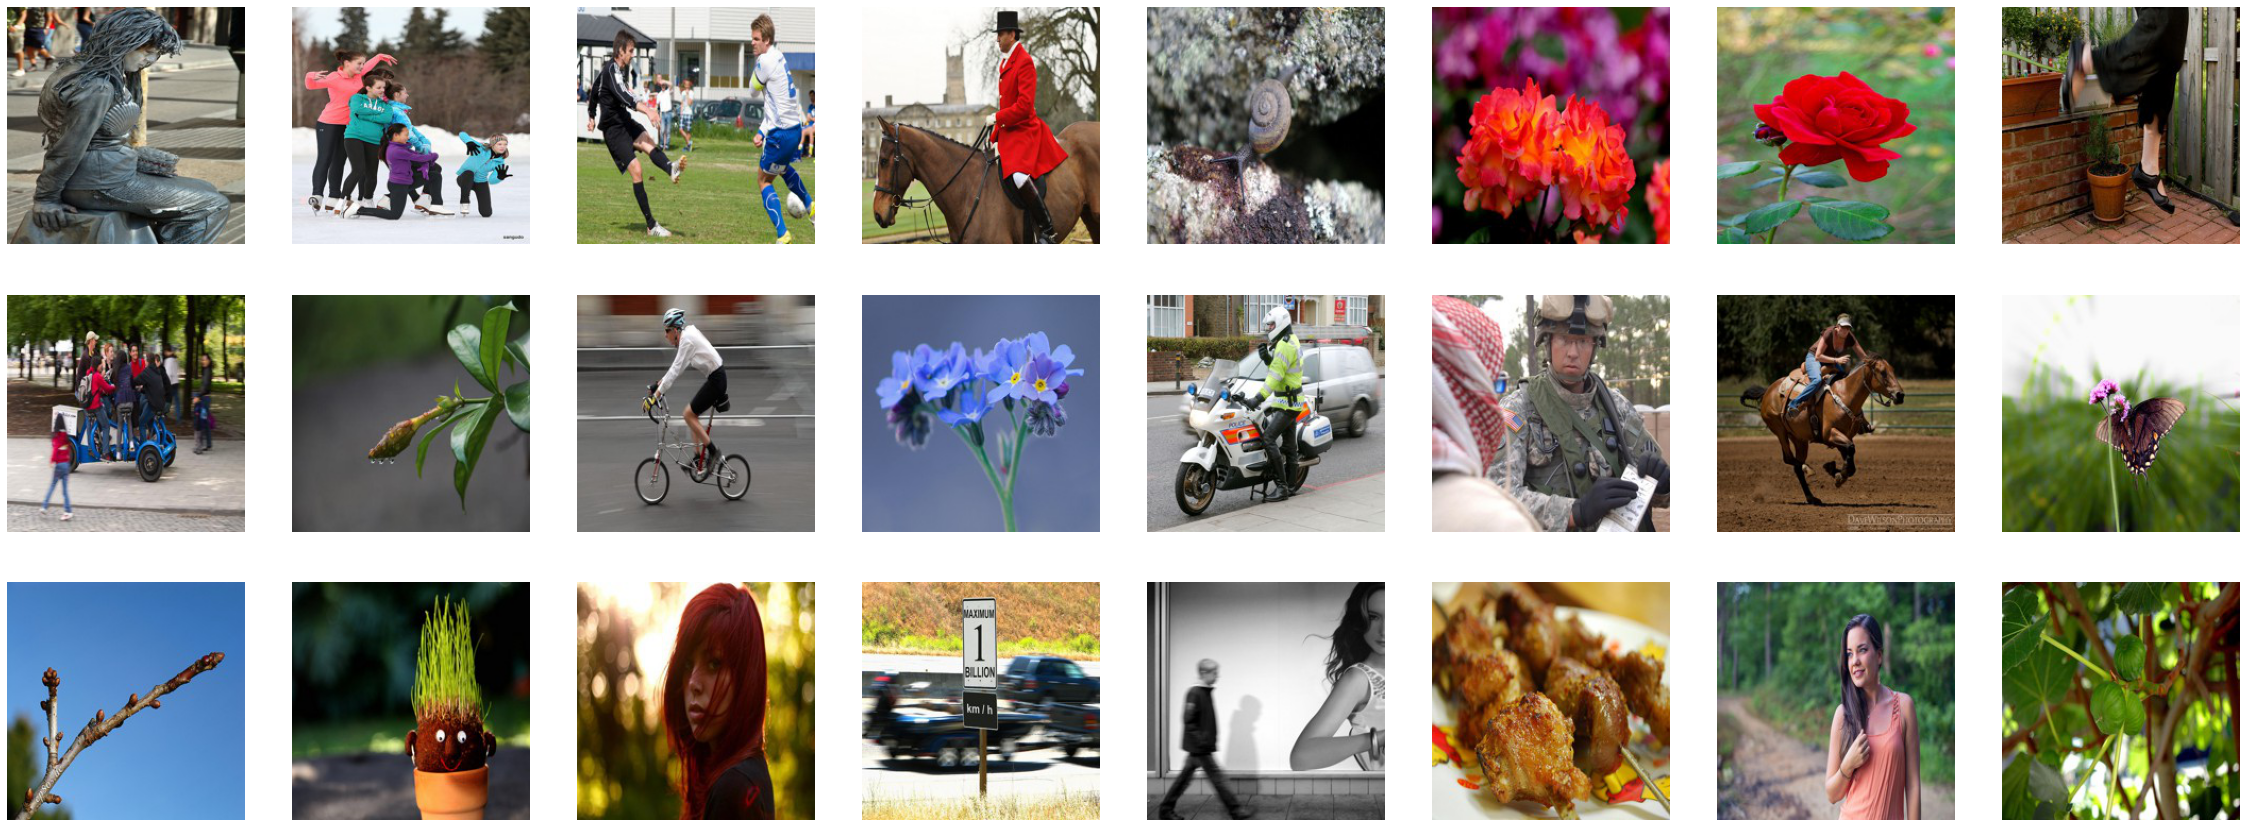

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40, 15))
columns = 8
rows = 3
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(images[i],cmap='binary')
    plt.axis("off")
plt.show()

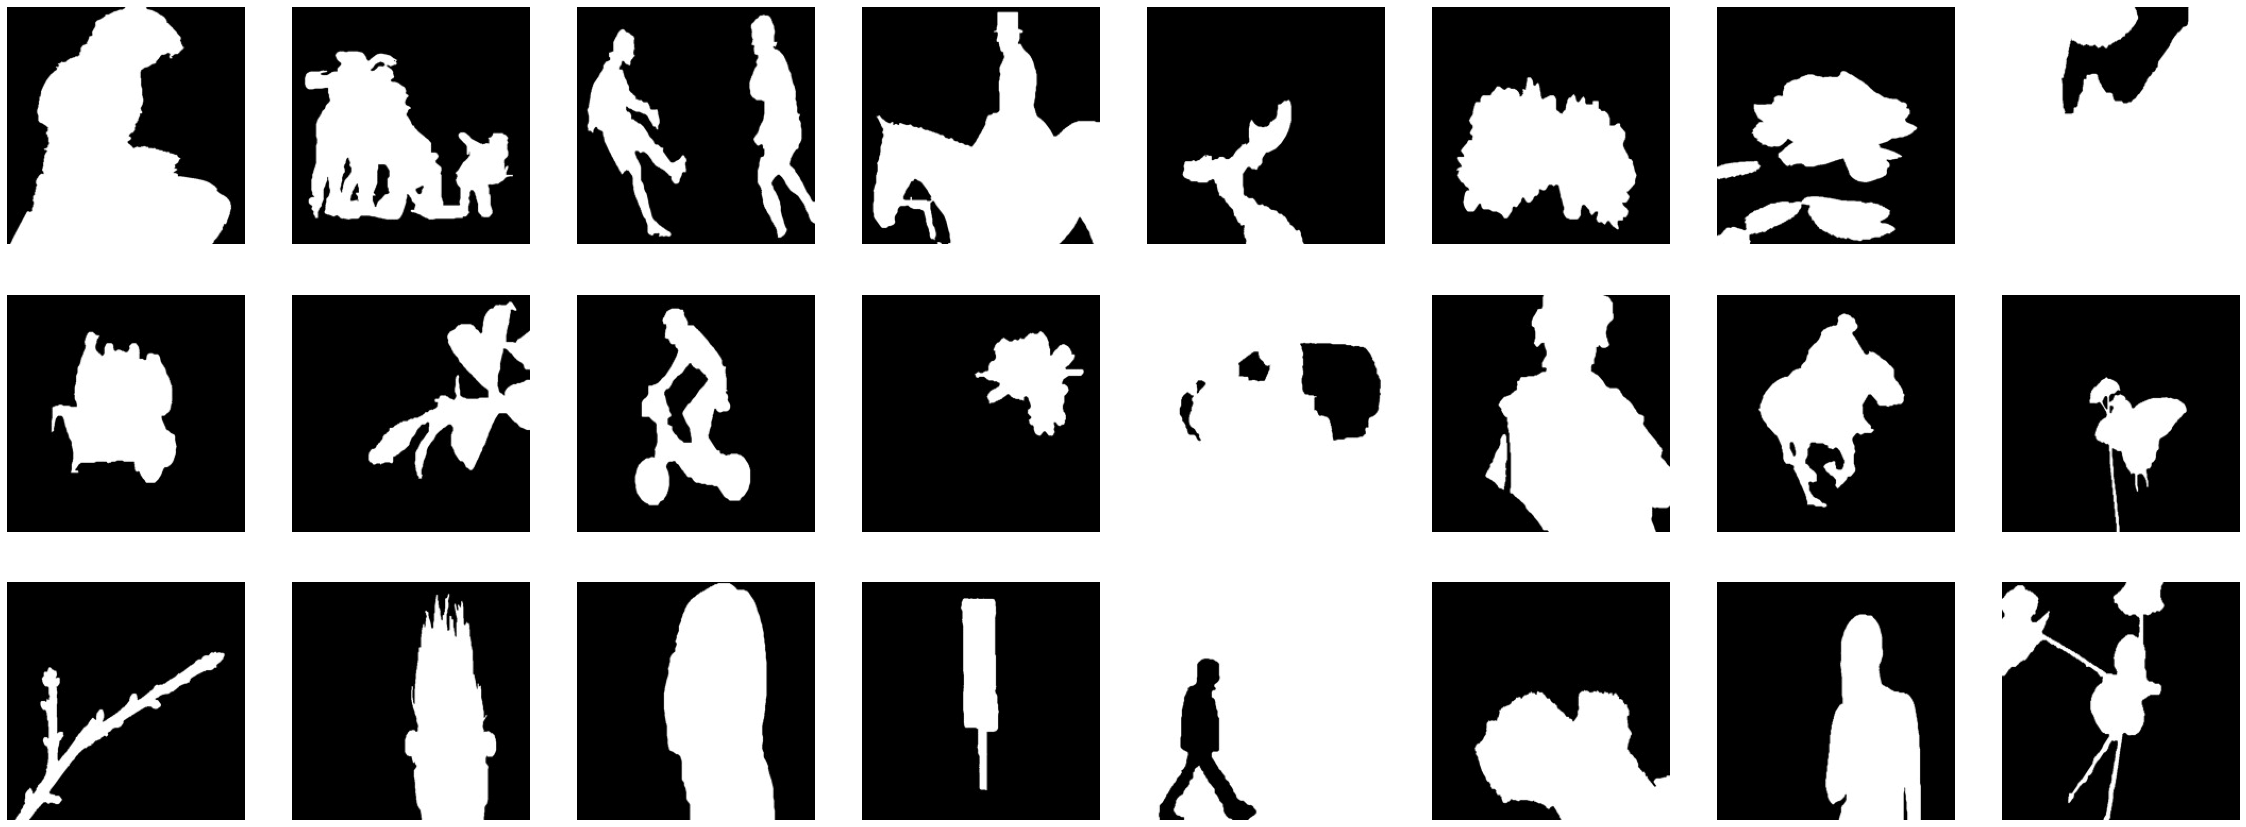

In [15]:
import matplotlib.pyplot as plt
images = labels
fig = plt.figure(figsize=(40, 15))
columns = 8
rows = 3
for i in range(0, columns*rows):
    fig.add_subplot(rows, columns,i+1)
    plt.imshow(images[i],cmap='binary')
    plt.axis("off")
plt.show()

In [16]:
! zip -q -r train.zip train